In [15]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Import Loan Prediction Data

In [17]:
# reading the loan prediction data
data=pd.read_csv("D:/Python/Big Mart Sales/Train.csv")

In [19]:
# looking at the first five rows of the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Understanding Loan Dataset


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
# Basic Statistical information of Loan Dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
# Shape of the data
data.shape

(8523, 12)

In [23]:
# Checking Missing value in dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
# Datatype of Variables
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Pre-processing Steps

<ol>1. Filling the missing values</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

In [25]:
data.drop(axis=1,columns=['Item_Identifier','Outlet_Identifier'],inplace = True)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
data.describe()
#here min visiblity is 0 which does not make sense
#conisdering it still minimum lets replace that with 10 percentile

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [30]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [31]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [32]:
data['Item_Fat_Content'].value_counts()
#LF ~ Low Fat and reg ~ regular and low fat ~ Low Fat
#so replace them also

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'},inplace = True)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

C:\Users\jatin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

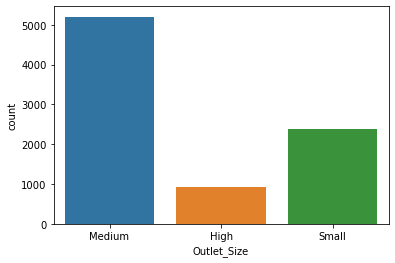

In [35]:
import seaborn as sns
sns.countplot(data['Outlet_Size'])

In [36]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
dummy = pd.get_dummies(data,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True)
data=dummy
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [39]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [40]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.048866,0.927507,0.583333,0.283587,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.058705,0.072068,1.000000,0.031419,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,17.50,0.051037,0.468288,0.583333,0.158115,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,0.640093,0.541667,0.053555,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,0.095805,0.083333,0.073651,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0



# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

In [41]:
# Shape of Dataset

data.shape

(8523, 28)

In [42]:
# Separating the independents and dependents variable

# Store all independent variables in X

x=data.drop('Item_Outlet_Sales',axis=1)

# Store Dependent variable in y

y=data['Item_Outlet_Sales']

In [43]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [46]:
# Importing Keras Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense , Dropout

In [47]:
# defining the architecture of the model
model = Sequential()
#Input Layer
model.add(Dense(128,kernel_initializer='normal',input_shape=(x_train.shape[1],),activation='relu'))

#Hidden Layers
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))

#Output Layer
model.add(Dense(1,kernel_initializer='normal',activation='linear'))

#compile
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               3584      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 168,449
Trainable params: 168,449
Non-trainable params: 0
________________________________________________

In [48]:
#training
model.fit(x_train,y_train,epochs=1000,batch_size=64,validation_split=0.2)

Epoch 1/1000
80/80 [==============================] - 2s 9ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - val_loss: 0.0646 - val_mean_absolute_error: 0.0646
Epoch 2/1000
80/80 [==============================] - 0s 6ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - val_loss: 0.0589 - val_mean_absolute_error: 0.0589
Epoch 3/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - val_loss: 0.0671 - val_mean_absolute_error: 0.0671
Epoch 4/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - val_loss: 0.0637 - val_mean_absolute_error: 0.0637
Epoch 5/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - val_loss: 0.0581 - val_mean_absolute_error: 0.0581
Epoch 6/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - val_loss: 0.0595 - val_mean_absolute_error: 0.0595
Epoch 7/1000
80/

80/80 [==============================] - 0s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - val_loss: 0.0583 - val_mean_absolute_error: 0.0583
Epoch 51/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - val_loss: 0.0595 - val_mean_absolute_error: 0.0595
Epoch 52/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - val_loss: 0.0595 - val_mean_absolute_error: 0.0595
Epoch 53/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - val_loss: 0.0583 - val_mean_absolute_error: 0.0583
Epoch 54/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - val_loss: 0.0587 - val_mean_absolute_error: 0.0587
Epoch 55/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - val_loss: 0.0582 - val_mean_absolute_error: 0.0582
Epoch 56/1000
80/80 [===

Epoch 100/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - val_loss: 0.0614 - val_mean_absolute_error: 0.0614
Epoch 101/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - val_loss: 0.0616 - val_mean_absolute_error: 0.0616
Epoch 102/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - val_loss: 0.0613 - val_mean_absolute_error: 0.0613
Epoch 103/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - val_loss: 0.0622 - val_mean_absolute_error: 0.0622
Epoch 104/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - val_loss: 0.0638 - val_mean_absolute_error: 0.0638
Epoch 105/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - val_loss: 0.0617 - val_mean_absolute_error: 0.0617
Epoc

80/80 [==============================] - 1s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - val_loss: 0.0637 - val_mean_absolute_error: 0.0637
Epoch 150/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - val_loss: 0.0638 - val_mean_absolute_error: 0.0638
Epoch 151/1000
80/80 [==============================] - 1s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - val_loss: 0.0648 - val_mean_absolute_error: 0.0648
Epoch 152/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - val_loss: 0.0650 - val_mean_absolute_error: 0.0650
Epoch 153/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - val_loss: 0.0640 - val_mean_absolute_error: 0.0640
Epoch 154/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - val_loss: 0.0641 - val_mean_absolute_error: 0.0641
Epoch 155/1000
80/8

80/80 [==============================] - 1s 10ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - val_loss: 0.0650 - val_mean_absolute_error: 0.0650
Epoch 199/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0660 - val_mean_absolute_error: 0.0660
Epoch 200/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - val_loss: 0.0662 - val_mean_absolute_error: 0.0662
Epoch 201/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0665 - val_mean_absolute_error: 0.0665
Epoch 202/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - val_loss: 0.0669 - val_mean_absolute_error: 0.0669
Epoch 203/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0656 - val_mean_absolute_error: 0.0656
Epoch 204/1000
80/

80/80 [==============================] - 1s 7ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - val_loss: 0.0673 - val_mean_absolute_error: 0.0673
Epoch 248/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - val_loss: 0.0666 - val_mean_absolute_error: 0.0666
Epoch 249/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0664 - val_mean_absolute_error: 0.0664
Epoch 250/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - val_loss: 0.0694 - val_mean_absolute_error: 0.0694
Epoch 251/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - val_loss: 0.0674 - val_mean_absolute_error: 0.0674
Epoch 252/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - val_loss: 0.0658 - val_mean_absolute_error: 0.0658
Epoch 253/1000
80/8

80/80 [==============================] - 1s 10ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - val_loss: 0.0688 - val_mean_absolute_error: 0.0688
Epoch 297/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - val_loss: 0.0669 - val_mean_absolute_error: 0.0669
Epoch 298/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - val_loss: 0.0682 - val_mean_absolute_error: 0.0682
Epoch 299/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - val_loss: 0.0671 - val_mean_absolute_error: 0.0671
Epoch 300/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - val_loss: 0.0681 - val_mean_absolute_error: 0.0681
Epoch 301/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - val_loss: 0.0691 - val_mean_absolute_error: 0.0691
Epoch 302/1000
80/

80/80 [==============================] - 1s 8ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - val_loss: 0.0689 - val_mean_absolute_error: 0.0689
Epoch 346/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - val_loss: 0.0681 - val_mean_absolute_error: 0.0681
Epoch 347/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - val_loss: 0.0682 - val_mean_absolute_error: 0.0682
Epoch 348/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - val_loss: 0.0693 - val_mean_absolute_error: 0.0693
Epoch 349/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - val_loss: 0.0681 - val_mean_absolute_error: 0.0681
Epoch 350/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - val_loss: 0.0700 - val_mean_absolute_error: 0.0700
Epoch 351/1000
80/8

80/80 [==============================] - 1s 9ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - val_loss: 0.0684 - val_mean_absolute_error: 0.0684
Epoch 395/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - val_loss: 0.0697 - val_mean_absolute_error: 0.0697
Epoch 396/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - val_loss: 0.0687 - val_mean_absolute_error: 0.0687
Epoch 397/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - val_loss: 0.0699 - val_mean_absolute_error: 0.0699
Epoch 398/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - val_loss: 0.0694 - val_mean_absolute_error: 0.0694
Epoch 399/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - val_loss: 0.0695 - val_mean_absolute_error: 0.0695
Epoch 400/1000
80/8

80/80 [==============================] - 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - val_loss: 0.0711 - val_mean_absolute_error: 0.0711
Epoch 444/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - val_loss: 0.0691 - val_mean_absolute_error: 0.0691
Epoch 445/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - val_loss: 0.0695 - val_mean_absolute_error: 0.0695
Epoch 446/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - val_loss: 0.0697 - val_mean_absolute_error: 0.0697
Epoch 447/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - val_loss: 0.0695 - val_mean_absolute_error: 0.0695
Epoch 448/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 449/1000
80/8

Epoch 492/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - val_loss: 0.0723 - val_mean_absolute_error: 0.0723
Epoch 493/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - val_loss: 0.0708 - val_mean_absolute_error: 0.0708
Epoch 494/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 495/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - val_loss: 0.0701 - val_mean_absolute_error: 0.0701
Epoch 496/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - val_loss: 0.0701 - val_mean_absolute_error: 0.0701
Epoch 497/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - val_loss: 0.0694 - val_mean_absolute_error: 0.0694
Epoc

80/80 [==============================] - 0s 5ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - val_loss: 0.0700 - val_mean_absolute_error: 0.0700
Epoch 542/1000
80/80 [==============================] - 1s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0688 - val_mean_absolute_error: 0.0688
Epoch 543/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - val_loss: 0.0693 - val_mean_absolute_error: 0.0693
Epoch 544/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - val_loss: 0.0688 - val_mean_absolute_error: 0.0688
Epoch 545/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - val_loss: 0.0708 - val_mean_absolute_error: 0.0708
Epoch 546/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.0690 - val_mean_absolute_error: 0.0690
Epoch 547/1000
80/8

80/80 [==============================] - 1s 10ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - val_loss: 0.0700 - val_mean_absolute_error: 0.0700
Epoch 591/1000
80/80 [==============================] - 1s 10ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - val_loss: 0.0709 - val_mean_absolute_error: 0.0709
Epoch 592/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 593/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - val_loss: 0.0704 - val_mean_absolute_error: 0.0704
Epoch 594/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 595/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - val_loss: 0.0708 - val_mean_absolute_error: 0.0708
Epoch 596/1000
80

80/80 [==============================] - 1s 8ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - val_loss: 0.0689 - val_mean_absolute_error: 0.0689
Epoch 640/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - val_loss: 0.0711 - val_mean_absolute_error: 0.0711
Epoch 641/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 642/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - val_loss: 0.0698 - val_mean_absolute_error: 0.0698
Epoch 643/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - val_loss: 0.0690 - val_mean_absolute_error: 0.0690
Epoch 644/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - val_loss: 0.0691 - val_mean_absolute_error: 0.0691
Epoch 645/1000
80/8

80/80 [==============================] - 1s 7ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - val_loss: 0.0691 - val_mean_absolute_error: 0.0691
Epoch 689/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0687 - val_mean_absolute_error: 0.0687
Epoch 690/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0708 - val_mean_absolute_error: 0.0708
Epoch 691/1000
80/80 [==============================] - 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - val_loss: 0.0708 - val_mean_absolute_error: 0.0708
Epoch 692/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - val_loss: 0.0709 - val_mean_absolute_error: 0.0709
Epoch 693/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - val_loss: 0.0707 - val_mean_absolute_error: 0.0707
Epoch 694/1000
80/8

80/80 [==============================] - 0s 5ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - val_loss: 0.0690 - val_mean_absolute_error: 0.0690
Epoch 738/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0696 - val_mean_absolute_error: 0.0696
Epoch 739/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 740/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - val_loss: 0.0706 - val_mean_absolute_error: 0.0706
Epoch 741/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0706 - val_mean_absolute_error: 0.0706
Epoch 742/1000
80/80 [==============================] - 0s 5ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - val_loss: 0.0711 - val_mean_absolute_error: 0.0711
Epoch 743/1000
80/8

80/80 [==============================] - 1s 8ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0709 - val_mean_absolute_error: 0.0709
Epoch 787/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0706 - val_mean_absolute_error: 0.0706
Epoch 788/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0701 - val_mean_absolute_error: 0.0701
Epoch 789/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 790/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - val_loss: 0.0698 - val_mean_absolute_error: 0.0698
Epoch 791/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0697 - val_mean_absolute_error: 0.0697
Epoch 792/1000
80/8

80/80 [==============================] - 1s 9ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - val_loss: 0.0702 - val_mean_absolute_error: 0.0702
Epoch 836/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - val_loss: 0.0697 - val_mean_absolute_error: 0.0697
Epoch 837/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - val_loss: 0.0705 - val_mean_absolute_error: 0.0705
Epoch 838/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - val_loss: 0.0704 - val_mean_absolute_error: 0.0704
Epoch 839/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - val_loss: 0.0715 - val_mean_absolute_error: 0.0715
Epoch 840/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - val_loss: 0.0707 - val_mean_absolute_error: 0.0707
Epoch 841/1000
80/8

80/80 [==============================] - 1s 10ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - val_loss: 0.0706 - val_mean_absolute_error: 0.0706
Epoch 885/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - val_loss: 0.0701 - val_mean_absolute_error: 0.0701
Epoch 886/1000
80/80 [==============================] - 1s 10ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - val_loss: 0.0712 - val_mean_absolute_error: 0.0712
Epoch 887/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - val_loss: 0.0708 - val_mean_absolute_error: 0.0708
Epoch 888/1000
80/80 [==============================] - 1s 10ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - val_loss: 0.0711 - val_mean_absolute_error: 0.0711
Epoch 889/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - val_loss: 0.0712 - val_mean_absolute_error: 0.0712
Epoch 890/1000
8

Epoch 933/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - val_loss: 0.0690 - val_mean_absolute_error: 0.0690
Epoch 934/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - val_loss: 0.0702 - val_mean_absolute_error: 0.0702
Epoch 935/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - val_loss: 0.0708 - val_mean_absolute_error: 0.0708
Epoch 936/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - val_loss: 0.0696 - val_mean_absolute_error: 0.0696
Epoch 937/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - val_loss: 0.0707 - val_mean_absolute_error: 0.0707
Epoch 938/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - val_loss: 0.0707 - val_mean_absolute_error: 0.0707
Epoc

80/80 [==============================] - 1s 10ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - val_loss: 0.0693 - val_mean_absolute_error: 0.0693
Epoch 983/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - val_loss: 0.0712 - val_mean_absolute_error: 0.0712
Epoch 984/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - val_loss: 0.0710 - val_mean_absolute_error: 0.0710
Epoch 985/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - val_loss: 0.0705 - val_mean_absolute_error: 0.0705
Epoch 986/1000
80/80 [==============================] - 1s 7ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 987/1000
80/80 [==============================] - 1s 8ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - val_loss: 0.0713 - val_mean_absolute_error: 0.0713
Epoch 988/1000
80/

In [49]:
pred = model.predict(x_test)

In [50]:
from sklearn.metrics import r2_score,accuracy_score
r2_score(y_test,pred)

0.4035236294153006

## Using Linear Regression

In [52]:
ln=LinearRegression()

In [53]:
ln.fit(x_train,y_train)

LinearRegression()

In [54]:
ln_pred=ln.predict(x_test)

In [55]:
r2_score(y_test,ln_pred)

0.5580295966994984

## Using Random Forest Regressor

In [56]:
rm=RandomForestRegressor()

In [57]:
rm.fit(x_train,y_train)

RandomForestRegressor()

In [58]:
rm_pred=rm.predict(x_test)

In [59]:
r2_score(y_test,rm_pred)

0.5518376542462223

# Gradient Boosting Regressor

In [60]:
gb=GradientBoostingRegressor()

In [61]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [62]:
gb_pred=gb.predict(x_test)

In [63]:
r2_score(y_test,gb_pred)

0.594563836878998